# SVD (Singular Value Decomposition)
Reference: https://www.kaggle.com/madhurisivalenka/eda-pca-and-tsvd

Dataset: https://www.kaggle.com/c/santander-value-prediction-challenge/data

In [1]:
import pandas as pd
import numpy as np
import sklearn
from collections import Counter

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Read Dataset

In [2]:
train_df = pd.read_csv('./datasets/step_0/santander_value_prediction/train.csv')
# test_df = pd.read_csv('./datasets/step_0/santander_value_prediction/test.csv')

In [3]:
train_df.shape

(4459, 4993)

In [4]:
train_df.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [5]:
train_df.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


# Check Null Cells

In [7]:
train_df.isnull().sum().any()

False

# Observations
- The distribution of each feature is either 0 or huge value like 1e+7

# Inspect Features

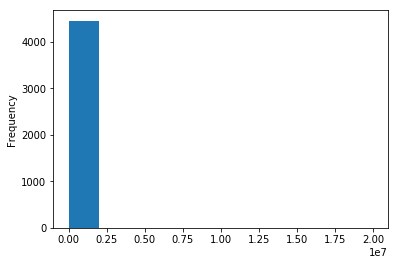

In [8]:
train_df['48df886f9'].plot.hist()

In [9]:
feature_name = '48df886f9'
index = train_df[feature_name] != 0
train_df[index]

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
452,1a6eeab3f,1450000.00,280000.00,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
595,226c12d98,3690666.66,600000.00,0,0.0,0,0,0,0,0,...,0.00,0.0,2134666.66,0,0,0,0,0,0,0
732,29f512db3,250000.00,200000.00,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
735,2a1ee0e61,200000.00,110000.00,0,202000.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
831,2f8c6923f,6000000.00,10000000.00,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
915,3576e488d,20000000.00,20000000.00,0,0.0,0,0,0,0,0,...,0.00,0.0,5000000.00,0,0,0,0,0,0,0
946,371826303,185000.00,548000.00,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
1004,39b310167,40000.00,346666.66,0,0.0,0,0,0,0,0,...,0.00,0.0,438666.66,0,0,0,0,0,0,0
1080,3e7aabc96,205000.00,5000000.00,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
1098,3f5e85beb,206000.00,1000000.00,0,0.0,0,0,0,0,0,...,0.00,0.0,438666.66,0,0,0,0,0,0,0


### Check duplications

In [10]:
len(set(train_df[feature_name]))

32

In [11]:
counts = Counter(train_df[feature_name])

In [12]:
counts.most_common(7)

[(0.0, 4420),
 (200000.0, 6),
 (10000000.0, 2),
 (5000000.0, 2),
 (50000.0, 2),
 (280000.0, 1),
 (600000.0, 1)]

#### Plot Histogram

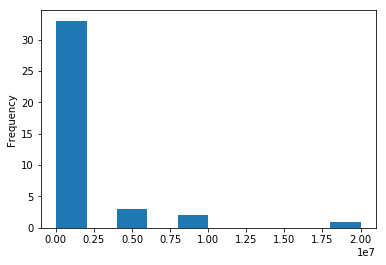

In [13]:
train_df[feature_name][index].plot.hist()

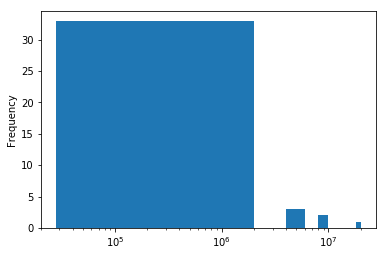

In [14]:
train_df[feature_name][index].plot(logx=True, kind='hist')

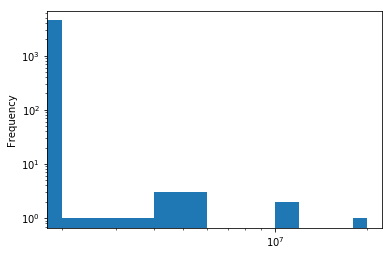

In [15]:
train_df[feature_name].plot(kind='hist', logx=True, logy=True)

#### Inspect 2nd Feature

In [16]:
feature_name = '0deb4b6a8'
index = train_df[feature_name] != 0

In [17]:
len(set(train_df[feature_name]))

5

In [18]:
counts = Counter(train_df[feature_name])
counts.most_common(10)

[(0, 4455), (6000, 1), (4000000, 1), (1196000, 1), (1000000, 1)]

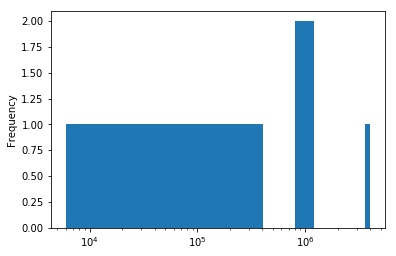

In [19]:

train_df[feature_name][index].plot(logx=True, kind='hist')

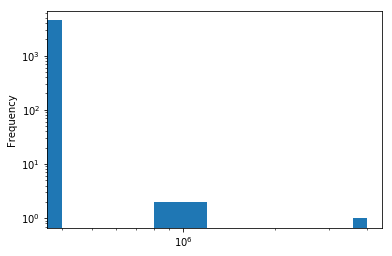

In [20]:
train_df[feature_name].plot(logx=True, logy=True, kind='hist')

# Inspect Target Values

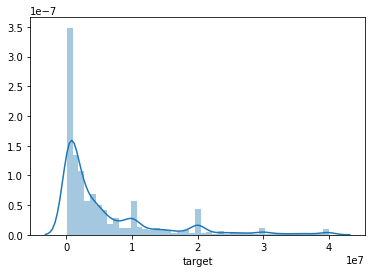

In [21]:
sns.distplot(train_df['target'])

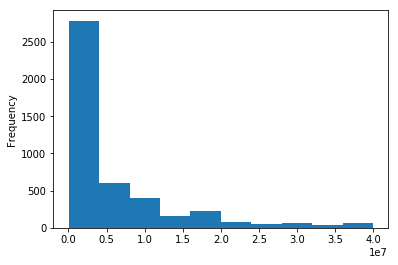

In [22]:
train_df['target'].plot.hist()

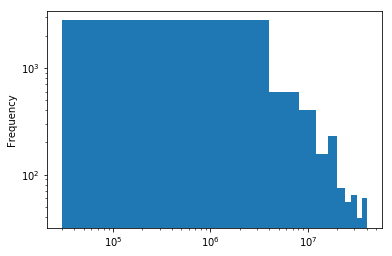

In [23]:
train_df['target'].plot(kind='hist', logx=True, logy=True)

#### Plot target using ```np.log1p```, i.e. (log(1 + p))
Because the distribution is skewed to 0, take log with offset = 1.

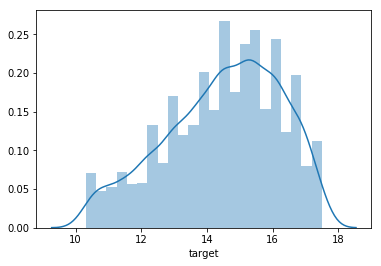

In [24]:
sns.distplot(np.log1p(train_df['target']))

In [25]:
train_df['target'].describe()

count    4.459000e+03
mean     5.944923e+06
std      8.234312e+06
min      3.000000e+04
25%      6.000000e+05
50%      2.260000e+06
75%      8.000000e+06
max      4.000000e+07
Name: target, dtype: float64

In [26]:
np.log1p(train_df['target']).describe()

count    4459.000000
mean       14.490239
std         1.750947
min        10.308986
25%        13.304687
50%        14.630876
75%        15.894952
max        17.504390
Name: target, dtype: float64

# Scatter plot of target and first feature

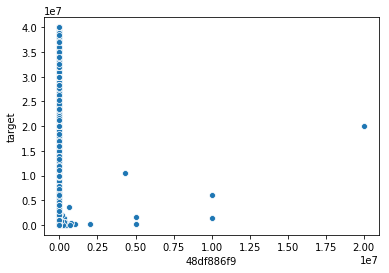

In [27]:
sns.scatterplot(x=train_df['48df886f9'],
                y=train_df['target'])

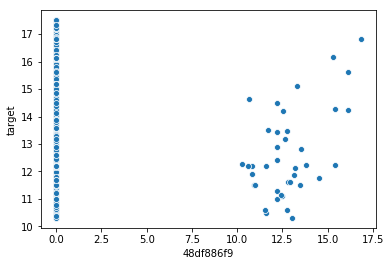

In [28]:
sns.scatterplot(x=np.log1p(train_df['48df886f9']),
                y=np.log1p(train_df['target']))

### Find the most common elements in target

In [29]:
counts = Counter(train_df['target'])
counts.most_common(5)

[(2000000.0, 207),
 (10000000.0, 199),
 (20000000.0, 156),
 (4000000.0, 148),
 (1000000.0, 129)]

In [30]:
len(counts)

1413

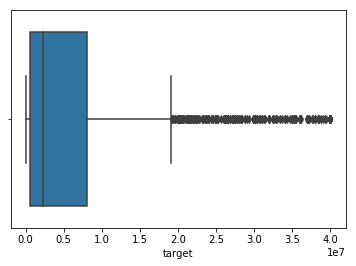

In [31]:
sns.boxplot(train_df['target'])

# Prepare X and y

In [32]:
x_train = train_df.iloc[:, 2:]

In [33]:
y_train = np.log1p(train_df.iloc[:, 1])

In [34]:
x_train.shape

(4459, 4991)

In [35]:
x_train.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [36]:
y_train.shape

(4459,)

In [37]:
y_train.head()

0    17.453097
1    13.304687
2    16.118096
3    14.508658
4    16.482739
Name: target, dtype: float64

# Recycle Memory for PCA or TruncatedSVD

In [38]:
# del train_df
# del sklearn
# del sns

# import gc
# gc.collect()

# Apply PCA
It might encounter memory shortage issue.

In [39]:
# from sklearn.decomposition import PCA

In [40]:
# pca_x = PCA(0.95).fit(x_train)

# Apply TruncatedSVD

In [41]:
x_train.shape

(4459, 4991)

In [42]:
SEED=42

from sklearn.decomposition import TruncatedSVD
svd_x = TruncatedSVD(n_components=1500,
                      n_iter=5,
                      random_state=SEED)

svd_x.fit(x_train)

TruncatedSVD(algorithm='randomized', n_components=1500, n_iter=5,
       random_state=42, tol=0.0)

In [48]:
svd_x.explained_variance_ratio_.shape

(1500,)

In [49]:
svd_x.explained_variance_ratio_

array([5.24364695e-02, 3.45143405e-02, 3.45176725e-02, ...,
       1.20124132e-05, 1.19524965e-05, 1.18025365e-05])

In [57]:
svd_x.explained_variance_ratio_[:20]

array([0.05243647, 0.03451434, 0.03451767, 0.03449827, 0.03446226,
       0.03446417, 0.03445055, 0.03444875, 0.03442175, 0.03441169,
       0.02525125, 0.02044498, 0.01495975, 0.01197959, 0.01045721,
       0.01038475, 0.0102339 , 0.0101373 , 0.0100431 , 0.0093617 ])

In [50]:
sum(svd_x.explained_variance_ratio_)

0.995198345879054

# Plot PDF (Kernel Density Estimate)

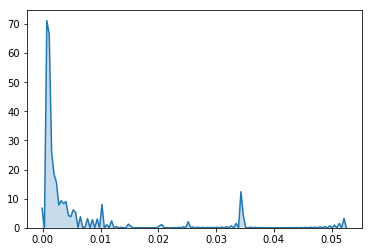

In [79]:
sns.kdeplot(svd_x.explained_variance_ratio_,
           shade=True)

# Plot CDF

In [82]:
cdf = np.cumsum(svd_x.explained_variance_ratio_)
cdf.shape

(1500,)

In [83]:
cdf[:10]

array([0.05243647, 0.08695081, 0.12146848, 0.15596675, 0.19042901,
       0.22489319, 0.25934374, 0.29379249, 0.32821424, 0.36262593])

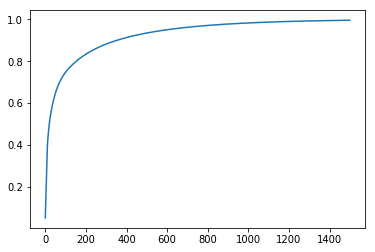

In [91]:
plt.plot(cdf)

### Probability > 95% when Index = 601 

In [93]:
index = cdf > 0.95
index.argmax()

601

# Transform Data

In [95]:
x_train_svd = svd_x.transform(x_train)

In [96]:
x_train_svd.shape

(4459, 1500)